# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('C:/Users/risha/Desktop/Datasets/Data analytics_dataset/Portfolio_special/Python_Projects/Netflix movie analysis/mymoviedb.csv', lineterminator='\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Data Cleaning / Data Preprocessing

In [4]:
# Checking if any null values are present in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
# To check starting 5 genres.
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
# Check if any duplicates are present.
df.duplicated().sum()

0

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Exploration Summary

1) we have a dataset consisting of 9827 rows and 9 columns.
2) Our dataset looks a bit tidy with no nulls and duplicated values.
3) Release_Date column needs to be casted into date time and to extract only the year value.
4) Overview, Original_Language and Poster-Url wouldn't be so useful during the analysis, sowill drop them.
5) There is noticable outliers in Popularity column.
6) Vote_Average better be categorized for proper analysis.
7) Genre column has comma seperated values and white spaces that needs to be handled and casted into category.


In [8]:
# Changing 'Release_date' column's dtype.
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)

datetime64[ns]


In [9]:
# Converting the values of 'Release_date' column into only year.
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int64')

In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [11]:
# Dropping the extra columns that are not useful.
cols= ['Overview', 'Original_Language','Poster_Url']   # Making a list of unwanted columns 
df.drop(cols, axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

Categorizing Vote_Average column

We would cut the Vote_Average values and make 4 categories: popular, average, below_average, not_popular to describe it more using categorized_col() function provided above.

In [12]:
def categorized_col(df, col, labels):
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates= 'drop')
    return df

In [13]:
labels = ['not_popular', 'below_average', 'average', 'popular']

categorized_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [15]:
df['Vote_Average'].value_counts()

not_popular      2467
popular          2450
average          2412
below_average    2398
Name: Vote_Average, dtype: int64

In [16]:
df.dropna(inplace=True)       # Removing all the Nan values from the dataset.

df.isna().sum()               # Checking if all the Nan values are removed from the dataset.

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [17]:
# Spliting genres into list and then explode our dataframe to have only one genre per row for each movie.

df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [18]:
# Casting column into category.
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int64   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int64(2), object(1)
memory usage: 849.4+ KB


In [20]:
df.nunique()                          # To see how many unique values are there in dataframe.

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [21]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# Data Visualization

In [22]:
sns.set_style('whitegrid')

Q.1] What is the most frequent genre of movies released on Netflix? 

In [23]:
df['Genre'].describe()                             # Got an idea of what is the most popular genre.

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

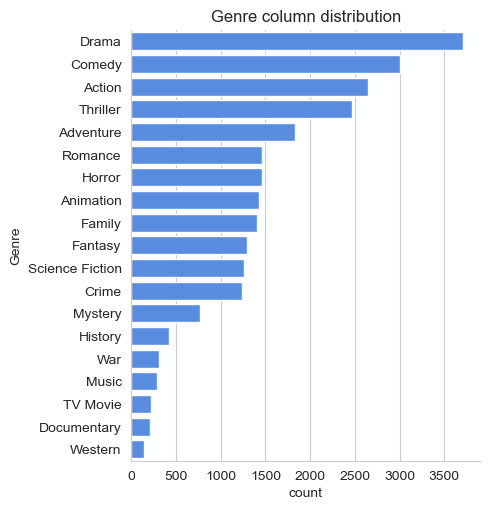

In [24]:
# Plotting a bar graph for first question.

sns.catplot(y= 'Genre', data= df, kind= 'count', order= df['Genre'].value_counts().index,
           color= '#4287f5')
plt.title("Genre column distribution")
plt.show()

Q.2] Which has highest votes in vote average column?

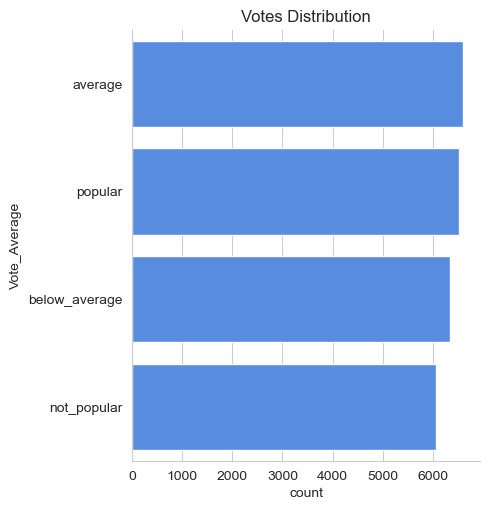

In [29]:
# Plotting a bar graph for Vote_average column.
sns.catplot(y = 'Vote_Average', data=df, kind= 'count', order= df['Vote_Average'].value_counts().index,
           color= '#4287f5')
plt.title("Votes Distribution")
plt.show()

Q.3] What movie got the higest popularity? What's its genre?

In [30]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


Q.4] What movie got the lowest popularity? What's its genre?

In [31]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


Q.5] Which year has the most filmmed movies?

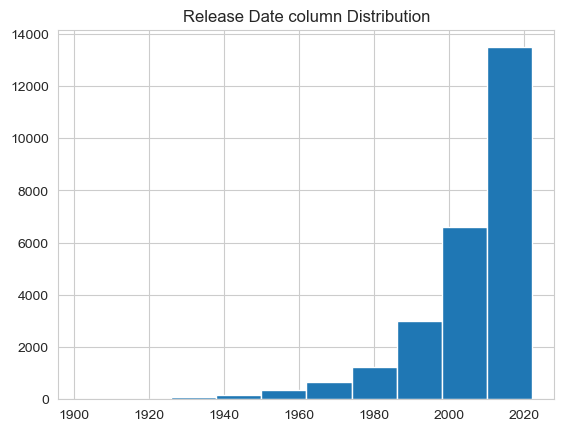

In [32]:
# Plotting a histogram graph.
df['Release_Date'].hist()
plt.title("Release Date column Distribution")
plt.show()

Summary / Conclusion:

- Drama genre is the most frequent genrein our dataset and has appeared more than 14%of the times among 19 other genre.
- We have 25.5% of our dataset with popular vote (6520 rows).Drama again gets the highest popularity among fans by having more than 18.5% of movies popularities.
- Spiderman: No Way Home has the highest popularity rate in our dataset and it has genre of Action, Adventure and Science Fiction.
- The United States vs. Billie Holiday, threads has the lowest popularity rate in our dataset and it has genre of music, drama, war,sci-fi, and history.
- The year 2020 has the highest rate of filmming rate in our dataset.